!pip install tensorflow


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.9
Tensorflow version: 2.17.0
Keras version: 3.5.0


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [2]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [3]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [4]:
import numpy as np

# Load the MNIST dataset from the manually downloaded file
path = 'mnist.npz'  # Update this path if the file is saved elsewhere
with np.load(path) as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

print("Data loaded successfully.")


Data loaded successfully.


In [5]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [6]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [7]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows:

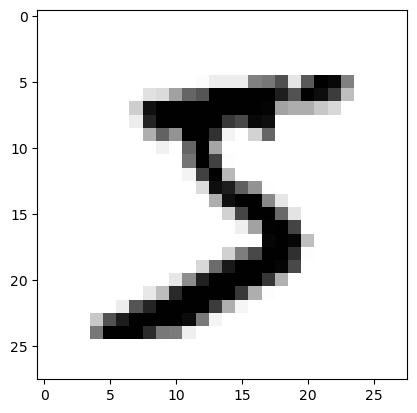

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

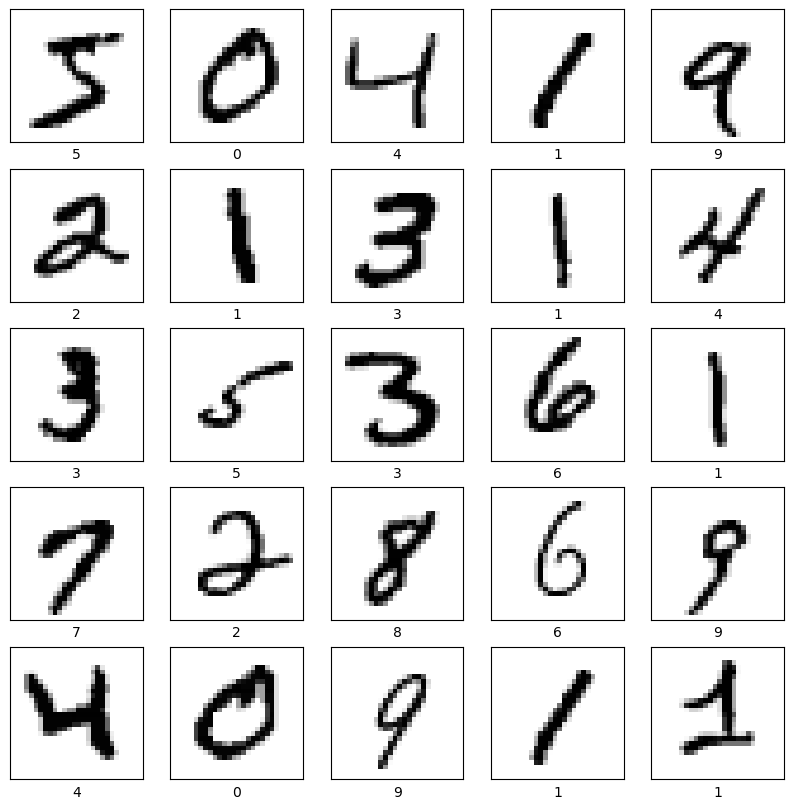

In [9]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Reshaping the data

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [10]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [11]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [12]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [13]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The las layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...


In [14]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

C:\ProgramData\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Here is our model summary so far.

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

In [16]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Compile the model

In [17]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [18]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 153s 71ms/step - accuracy: 0.8649 - loss: 0.4333 - val_accuracy: 0.9759 - val_loss: 0.0774
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 71ms/step - accuracy: 0.9767 - loss: 0.0783 - val_accuracy: 0.9860 - val_loss: 0.0443
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 123s 66ms/step - accuracy: 0.9832 - loss: 0.0543 - val_accuracy: 0.9862 - val_loss: 0.0401
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 117s 62ms/step - accuracy: 0.9875 - loss: 0.0405 - val_accuracy: 0.9885 - val_loss: 0.0349
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 66ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9879 - val_loss: 0.0325
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 67ms/step - accuracy: 0.9912 - loss: 0.0268 - val_accuracy: 0.9896 - val_loss: 0.0353
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 69ms/step - accuracy: 0.9917 - loss: 0.0238 - val_accuracy: 0.9871 - val_loss: 0.0381
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 127s 68ms/step - accuracy: 

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

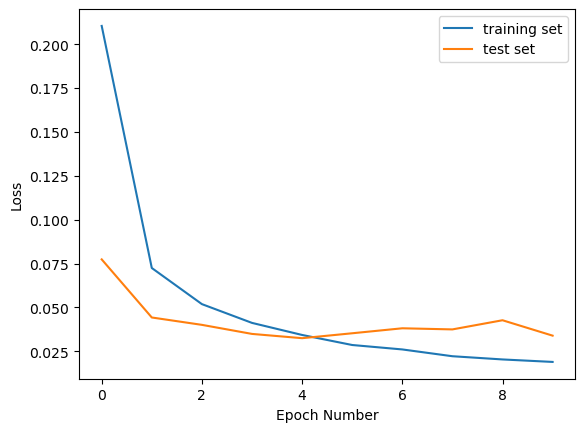

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

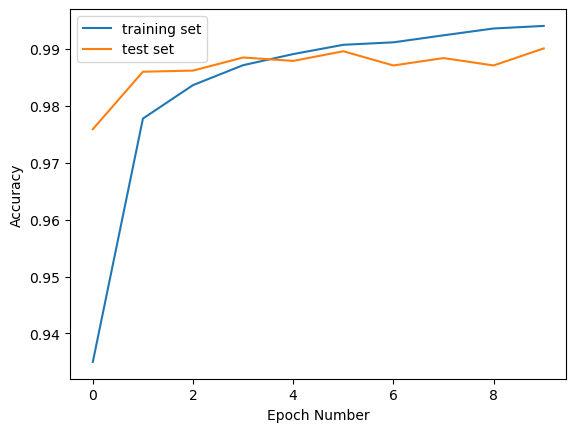

In [20]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [21]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [22]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.007757855579257011
Training accuracy:  0.9974166750907898


### Test set accuracy

In [23]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [24]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.03395211696624756
Validation accuracy:  0.9901000261306763


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model shuold be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [25]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [26]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [27]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step


In [28]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [29]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,5.563446e-13,2.189963e-09,1.129603e-10,5.868256e-08,4.455857e-09,5.776150e-09,3.304419e-19,9.999996e-01,2.322185e-10,3.436080e-07
1,3.087986e-12,1.011155e-08,1.000000e+00,1.602280e-16,1.242664e-17,4.352338e-18,2.105502e-13,7.913274e-17,1.526903e-13,9.454369e-19
2,7.016672e-09,9.999980e-01,3.571709e-08,2.979859e-13,2.551964e-07,1.273620e-07,2.186590e-07,1.466199e-06,1.122836e-08,2.717643e-08
3,9.999820e-01,1.836657e-12,3.176890e-10,9.212452e-10,7.588787e-11,5.645691e-07,1.700897e-05,6.557233e-11,3.805982e-07,7.039861e-08
4,3.220171e-16,1.757914e-12,2.180217e-14,2.009606e-14,9.999706e-01,3.572469e-12,1.271943e-13,6.794680e-13,2.105050e-09,2.949304e-05
...,...,...,...,...,...,...,...,...,...,...
9995,4.915356e-17,1.998155e-12,1.000000e+00,4.565241e-14,1.737678e-18,1.285158e-22,5.399459e-22,8.663396e-12,6.148179e-12,8.658951e-20
9996,9.232979e-15,1.347041e-11,1.329975e-10,9.999995e-01,4.140562e-18,5.137624e-07,3.079779e-16,1.205410e-13,2.379323e-10,1.728544e-10
9997,4.203824e-20,4.706606e-12,1.281851e-17,6.446930e-18,1.000000e+00,9.999347e-13,1.506313e-14,1.041443e-12,2.533969e-11,6.374372e-11
9998,1.356748e-17,1.956147e-18,3.051495e-21,1.233610e-08,6.560244e-21,9.999998e-01,8.019806e-12,1.898741e-19,2.694845e-07,1.473130e-16


In [30]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


So our model is predicting that the first example from the test set is `7`.

In [31]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

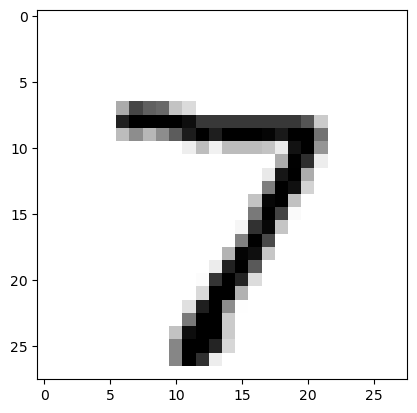

In [32]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

C:\Users\Snehal Mane\AppData\Local\Temp\ipykernel_15184\1227573385.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


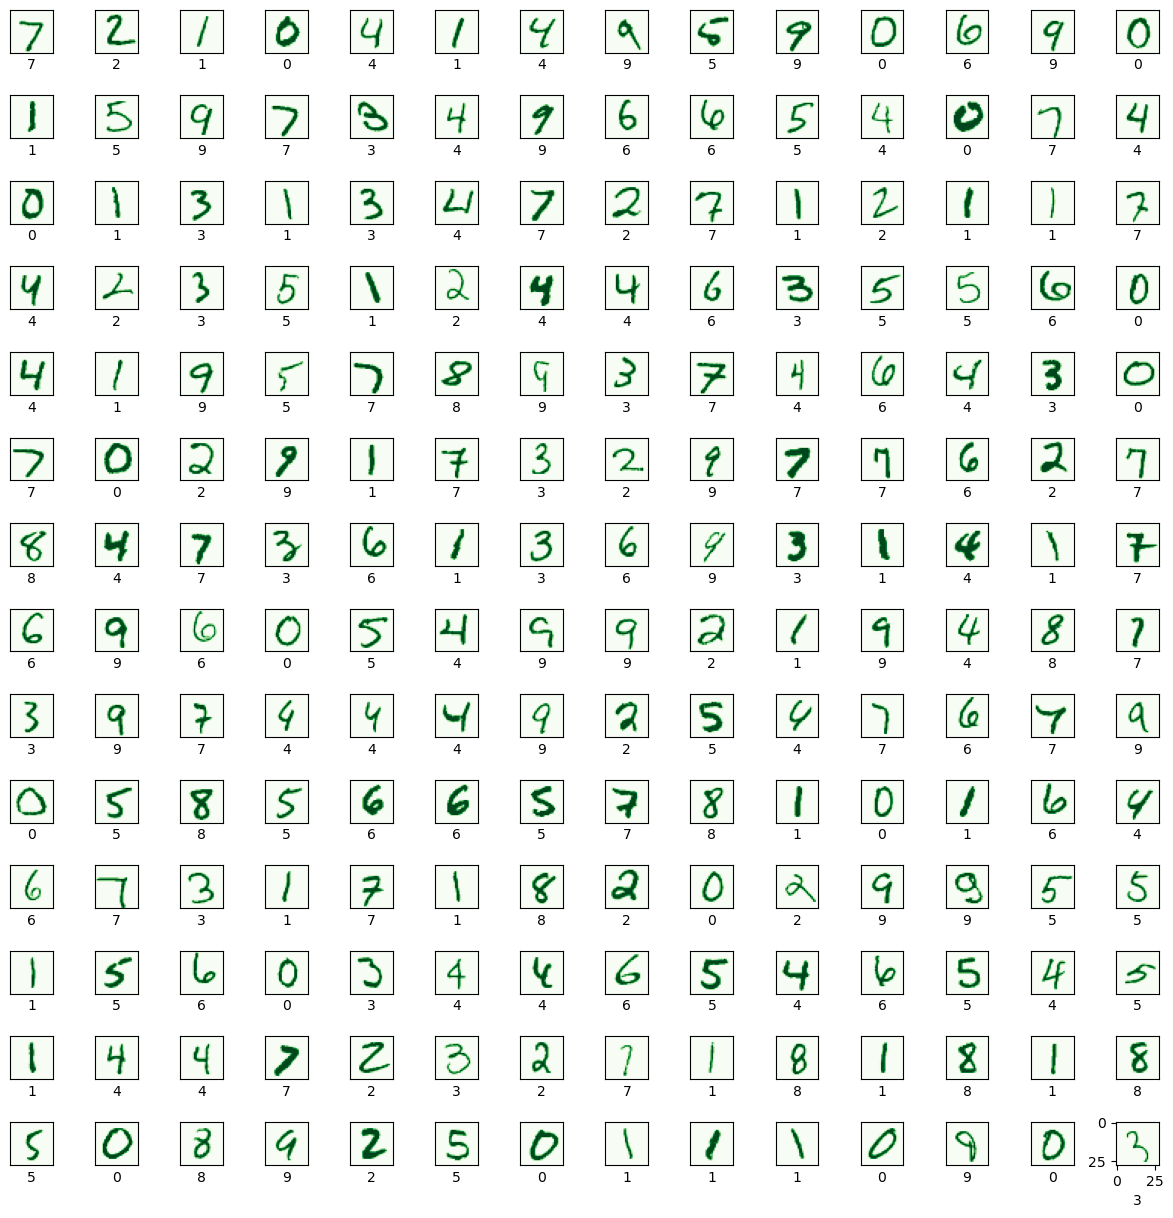

In [33]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

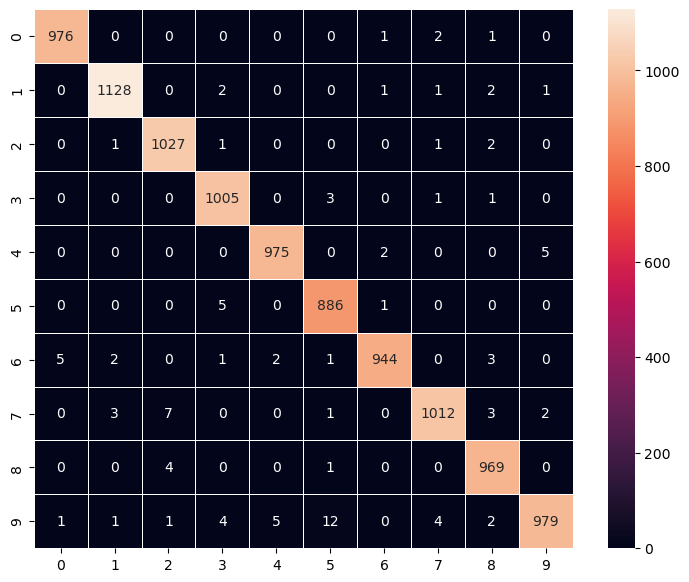

In [34]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()